In [43]:
import pandas as pd
# Import the Pandas library for data manipulation and analysis

import matplotlib.pyplot as plt
# Import the Matplotlib library for data visualization

import numpy as np
# Import the NumPy library for numerical computing

import seaborn as sns
# Import the Seaborn library for data visualization

from sklearn.model_selection import train_test_split
# Import the train_test_split function from scikit-learn for splitting a dataset into training and testing sets

from sklearn.linear_model import LinearRegression
# Import the LinearRegression class from scikit-learn for fitting linear regression models to data
# Linear regression analysis is used to predict the value of a variable based on the value of another variable.

from sklearn.preprocessing import StandardScaler
# Import the StandardScaler class from scikit-learn for standardizing features by removing the mean and scaling to unit variance

In [44]:
data = pd.read_csv('housing.csv')
# here we are uploading data of california houses

In [45]:
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [46]:
# Check the dataset
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [47]:
# Check the data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [48]:
# Drop rows with missing values
data.dropna(inplace=True)

In [49]:
# Split the dataset into training and testing sets
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [50]:
# Transform features
train_data = X_train.join(y_train)
# This line joins the features and target variables for the training data into a single DataFrame called train_data.

In [51]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
# These four lines compute the natural logarithm of several columns in train_data, 
# namely total_rooms, total_bedrooms, population, and households.
# Adding 1 before taking the logarithm helps to avoid issues with 
# taking the logarithm of zero or negative values.

In [52]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
# This line uses one-hot encoding to convert the categorical 
# variable ocean_proximity in train_data into binary 
# variables for each category using pd.get_dummies(). 
# The resulting variables are then added to train_data and 
# the original ocean_proximity column is dropped.

In [53]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms'] 
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']
# These two lines compute two new columns in train_data: 
#     bedroom_ratio and household_rooms. bedroom_ratio is the ratio 
#     of total bedrooms to total rooms in each record, 
#     while household_rooms is the ratio of total rooms to households in each record. 
#     These new columns may provide additional information for a machine learning model to learn from.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'household_rooms'}>]], dtype=object)

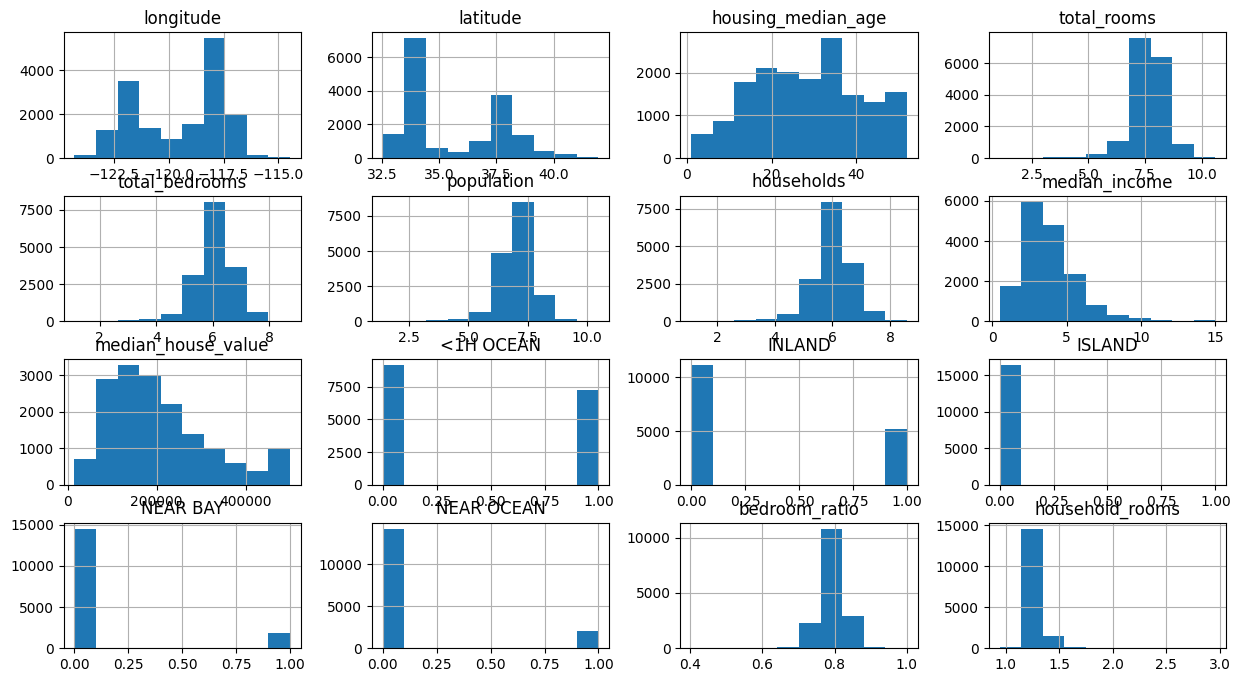

In [54]:
# Visualize the transformed features
train_data.hist(figsize=(15,8))
# This line of code creates a histogram for each numerical 
# column in the train_data DataFrame. 
# The figsize=(15,8) parameter sets the size of the figure in inches.

<Axes: >

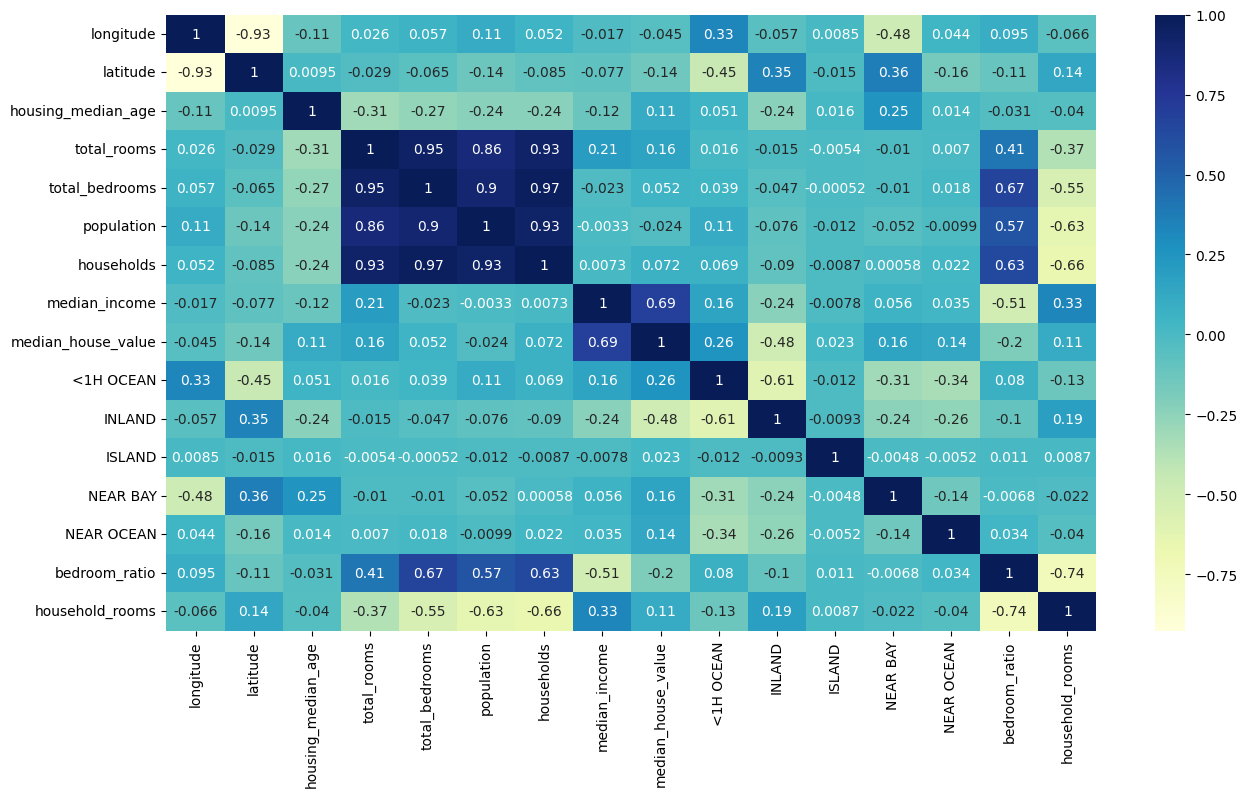

In [55]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True,cmap="YlGnBu")
# This line of code creates a heatmap of the correlation between the 
# columns of the train_data DataFrame using the seaborn library. 
# The figsize=(15,8) parameter sets the size of the figure in inches. 
# The annot=True parameter shows the correlation coefficients on the heatmap, 
# and the cmap="YlGnBu" parameter sets the color scheme for the heatmap.

<Axes: xlabel='latitude', ylabel='longitude'>

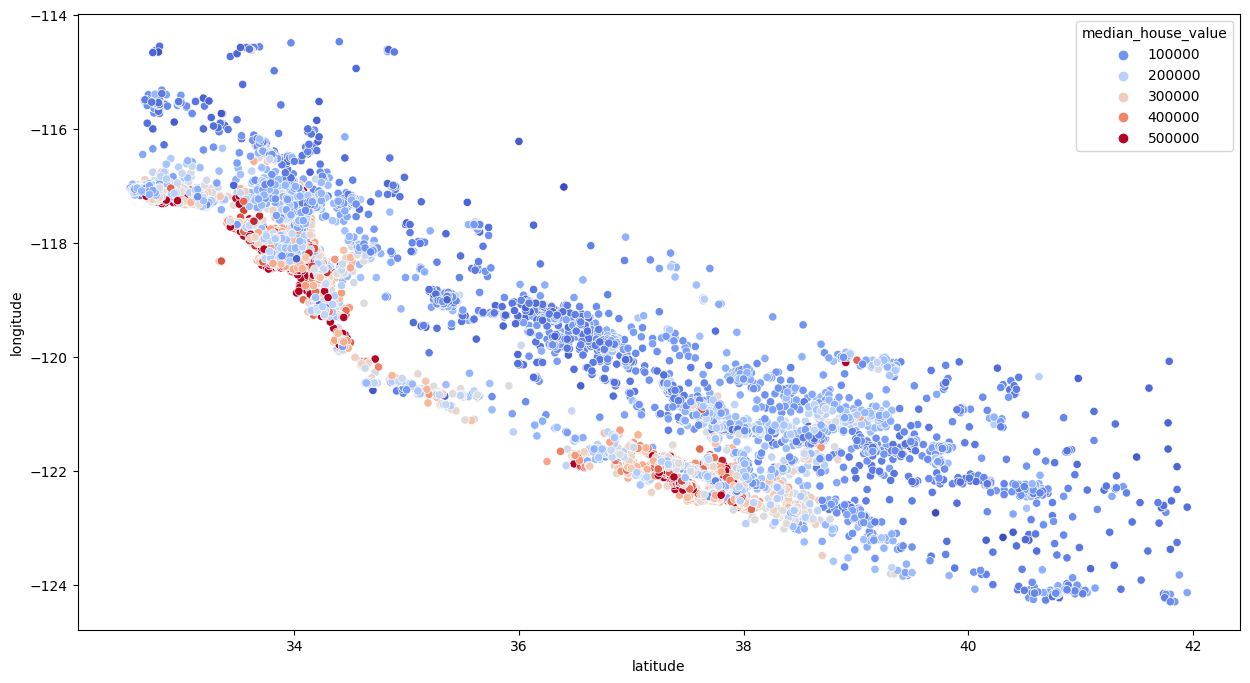

In [56]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude",data=train_data, hue="median_house_value",palette="coolwarm")
# This line of code creates a scatterplot of the latitude and longitude columns in the train_data 
# DataFrame using the seaborn library. The figsize=(15,8) parameter sets the 
# size of the figure in inches. 
# The hue="median_house_value" parameter sets the color of the points based 
# on the median_house_value column, and the palette="coolwarm" parameter sets the color scheme for the plot.

In [57]:
# Fit a linear regression model
# scaler = StandardScalar()
scaler = StandardScaler()
# - This line instantiates a StandardScaler object, which is a preprocessing 
# step that standardizes the data by scaling each feature to have a mean of 0 and a standard deviation of 1.

In [58]:
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)
# This line extracts the features (x_train) and target variable (y_train) 
# from the training data. Specifically, it drops the 'median_house_value' 
# column from train_data to get x_train, and selects only the 'median_house_value' column to get y_train.

In [59]:
reg = LinearRegression()
# This line instantiates a LinearRegression object, which represents a linear regression model.

In [60]:
reg.fit(x_train, y_train)
# This line fits the linear regression model to the training data using the fit() 
# method of the LinearRegression object. 
# The x_train and y_train variables are used as the input features and target 

LinearRegression()

In [61]:
# Transform the testing set
test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms'] 
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [62]:
x_test_s = scaler.transform(test_data.drop(['median_house_value'], axis=1))
# In this particular line of code, the scaler object is being used to 
# transform the test data (test_data.drop(['median_house_value'], axis=1)) 
# prior to using it for prediction.

In [63]:
# Evaluate the model
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']
reg.score(x_test, y_test)

0.676889805851181

In [64]:
train_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4255     -118.35     34.10                20.0     7.917901        6.663133   
4082     -118.38     34.16                42.0     7.765993        6.304449   
16545    -121.24     37.81                 6.0     8.264621        6.685861   
9781     -121.13     36.20                16.0     7.533159        6.095825   
14590    -117.17     32.83                24.0     8.172447        6.274762   
...          ...       ...                 ...          ...             ...   
1946     -120.91     38.73                11.0     8.605387        6.756932   
7612     -118.23     33.89                35.0     7.135687        5.843544   
13308    -117.61     34.08                20.0     8.174985        6.602588   
16813    -122.42     37.65                39.0     8.390041        6.796824   
10956    -117.88     33.75                50.0     7.204149        5.433722   

       population  households  median_income  median_house_value  <1H OCEAN  \
4255     7.057898    6.606650         3.9044            436400.0          1   
4082     6.971669    6.261492         3.1289            320600.0          1   
16545    7.749322    6.669498         3.5595            161000.0          0   
9781     7.188413    6.079933         2.9559            163200.0          1   
14590    7.372746    6.274762         5.3538            212500.0          0   
...           ...         ...            ...                 ...        ...   
1946     7.880804    6.732211         4.8350            230600.0          0   
7612     7.486053    5.840642         2.1949             95100.0          1   
13308    7.709757    6.525030         3.0199            128800.0          0   
16813    7.986845    6.788972         3.8565            239800.0          0   
10956    6.617403    5.459586         4.5125            195400.0          1   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  bedroom_ratio  household_rooms  
4255        0       0         0           0       0.841528         1.198474  
4082        0       0         0           0       0.811802         1.240278  
16545       1       0         0           0       0.808974         1.239167  
9781        0       0         0           0       0.809199         1.239020  
14590       0       0         0           1       0.767795         1.302431  
...       ...     ...       ...         ...            ...              ...  
1946        1       0         0           0       0.785198         1.278241  
7612        0       0         0           0       0.818918         1.221730  
13308       1       0         0           0       0.807658         1.252865  
16813       0       0         0           1       0.810106         1.235834  
10956       0       0         0           0       0.754249         1.319541  

[16346 rows x 16 columns]

In [65]:
test_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19031    -122.02     38.37                16.0     7.822445        5.805135   
6400     -118.05     34.13                23.0     8.091015        6.593045   
9125     -118.07     34.58                34.0     8.136518        6.400257   
18294    -122.10     37.39                35.0     7.812783        5.857933   
18328    -122.14     37.45                52.0     8.253748        6.287859   
...          ...       ...                 ...          ...             ...   
6304     -117.92     34.00                36.0     4.762174        3.433987   
12129    -117.23     33.89                 5.0     9.373819        7.616776   
13147    -121.70     38.10                19.0     8.496378        6.988413   
7756     -118.12     33.91                35.0     7.325808        5.634790   
14474    -117.23     32.85                25.0     8.349957        6.400257   

       population  households  median_income  median_house_value  <1H OCEAN  \
19031    7.020191    5.826000         6.4894            198000.0          0   
6400     7.297091    6.505784         3.7350            218300.0          0   
9125     7.565275    6.342121         4.0147            107400.0          0   
18294    6.782192    5.837730         7.6229            500001.0          0   
18328    7.238497    6.293419         7.8647            500001.0          0   
...           ...         ...            ...                 ...        ...   
6304     5.267858    3.583519         3.8125            136300.0          1   
12129    8.807921    7.555905         4.1953            136600.0          0   
13147    7.673688    6.809039         3.3398             89700.0          0   
7756     6.754604    5.529429         3.6917            197500.0          1   
14474    7.399398    6.354370         6.3955            316700.0          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  bedroom_ratio  household_rooms  
19031       1       0         0           0       0.742113         1.342678  
6400        1       0         0           0       0.814860         1.243665  
9125        1       0         0           0       0.786609         1.282933  
18294       0       0         1           0       0.749788         1.338325  
18328       0       0         1           0       0.761819         1.311489  
...       ...     ...       ...         ...            ...              ...  
6304        0       0         0           0       0.721097         1.328910  
12129       1       0         0           0       0.812558         1.240595  
13147       1       0         0           0       0.822517         1.247809  
7756        0       0         0           0       0.769170         1.324876  
14474       0       0         0           1       0.766502         1.314050  

[4087 rows x 16 columns]

In [66]:
reg.score(x_test, y_test)

0.676889805851181

In [67]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [68]:
forest.score(x_test_s,y_test)

0.8334784714552961

In [74]:
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "n_estimators": [100, 200, 300],
# #     "max_features": [8, 12, 20],
#     "min_samples_split":[2, 4],
#     "max_depth":[None, 4, 8]
# }

# grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

# grid_search.fit(x_train_s, y_train)
param_grid = {
    "n_estimators": [3, 10, 30],
    
    "max_features":[2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(x_train_s, y_train)   # <- add this line to perform the grid search


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [70]:
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_features': 8, 'n_estimators': 30}


In [73]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [71]:
best_forest = grid_search.best_estimator_

In [72]:
best_forest.score(x_test_s,y_test)

0.8229432310876188